Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2613 - Inteligencia Artificial
<br>

<center>
    <h2> Ayudantía 10 </h2>
    <h1> SVM: Support-vector machine </h1>
    <p>
        Blanca Romero: blanca.romero@uc.cl <br>
        Ignacio Villanueva: ignacio.villanueva@uc.cl<br>
        2023 - 2    
    </p>
    <br>
    <img src="https://miro.medium.com/max/1200/1*FGzasG-84SHk_XXSClcoqA.png" width="600"/>
</center>

<br>

---

#SVM Kernel Trick

Ejemplo extraído de: https://github.com/campusx-official/Support-Vector-Machines-SVM-/blob/master/Kernel%20Trick%20SVM.ipynb

Video explicativo: https://www.youtube.com/watch?v=Q7vT0--5VII

In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

#Librerias de visualización:
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap


Veamos los siguientes datos y analicemos que problemas podemos tener

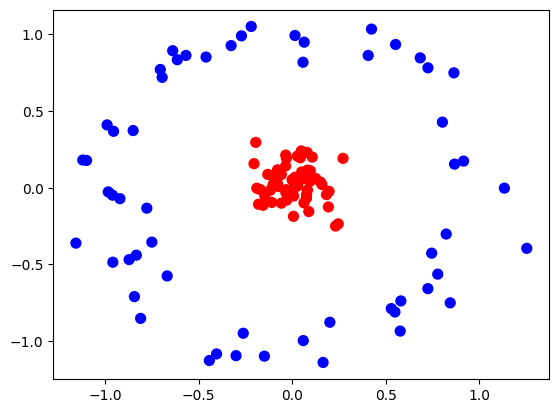

In [ ]:
X, y = make_circles(150, factor=.1, noise=.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='bwr')

¿Qué pasará si usamos un SVM lineal para clasificar estos datos?

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5333333333333333

In [ ]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-13-a07b99692898>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


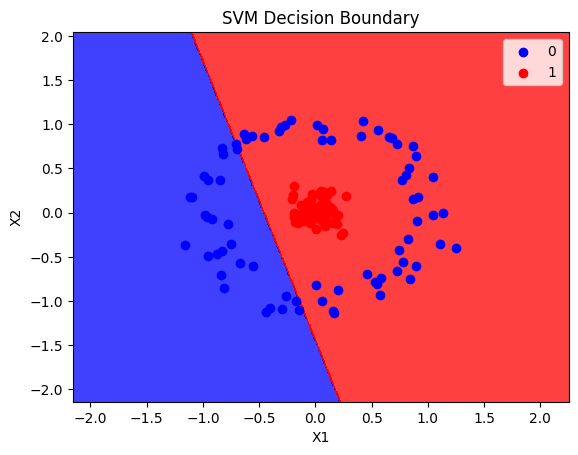

In [ ]:
plot_decision_boundary(X, y, classifier)

Notemos que nuestra solución es bastante mala (un 50% de accuracy es igual a tirar una moneda y decidir que clase es en base a eso), por lo tanto veamos que podemos hacer.

Notemos que si aplicamos una transformación, aumentando la dimensionalidad de estos, entonces podemos encontrar una recta, o en este caso un plano, que los divida.

In [ ]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))          # Esta función nos permite aumentar la dimensión de los datos
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

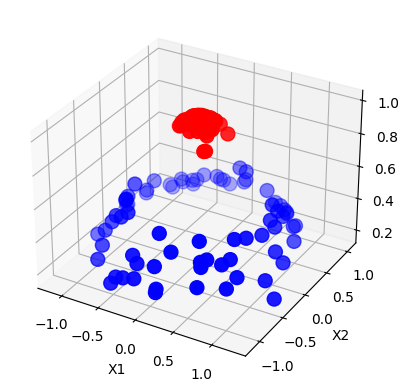

In [ ]:
plot_3d_plot(X,y)

In [ ]:
# Primero transformamos nuestros datos
r = np.exp(-(X ** 2).sum(1))
new_X = np.hstack((X, r.reshape(-1, 1)))
# Ahora new_X tiene dimensión (150, 3)
print(new_X.shape)
# Dividimos nuevamente en Entrenamiento y Test
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size = 0.20)


(150, 3)


Ahora encontremos nuestra solución con SVM lineal

In [ ]:
new_lineal = SVC(kernel="linear")
new_lineal.fit(new_X_train, new_y_train)
y_pred = new_lineal.predict(new_X_test)
print(accuracy_score(new_y_test, y_pred))

1.0


Como vemos ahora obtenemos un accuracy del 100%

Podemos ver que esta solución no es muy generalizable ya que va a depender de la naturaleza de los datos.

Aquí es donde podemos aplicar el kernel trick. Tomemos la definición de esta página [Kernel Trick in SVM
](https://medium.com/analytics-vidhya/how-to-classify-non-linear-data-to-linear-data-bb2df1a6b781#:~:text=What%20is%20Kernel%20Trick%3F,can%20get%20a%20linear%20classification.):

`El "Kernel Trick" se utiliza ampliamente en el modelo de Máquinas de Vectores de Soporte (SVM) para combinar linealidad y no linealidad. Convierte un espacio no lineal de dimensiones inferiores a un espacio de dimensiones superiores, lo que nos permite obtener una clasificación lineal.`

Usaremos otro tipo de kernel o de curva. Veamos el kernel `rbf`.

In [ ]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-13-a07b99692898>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


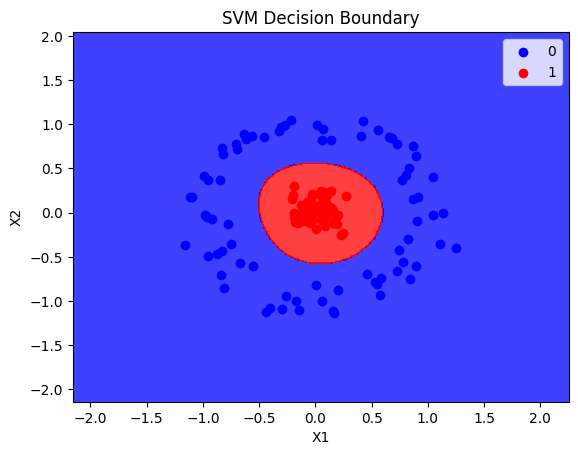

In [ ]:
plot_decision_boundary(X, y, rbf_classifier)

Veamos ahora un SVM con kernel polinomial de grado 2

In [ ]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-13-a07b99692898>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


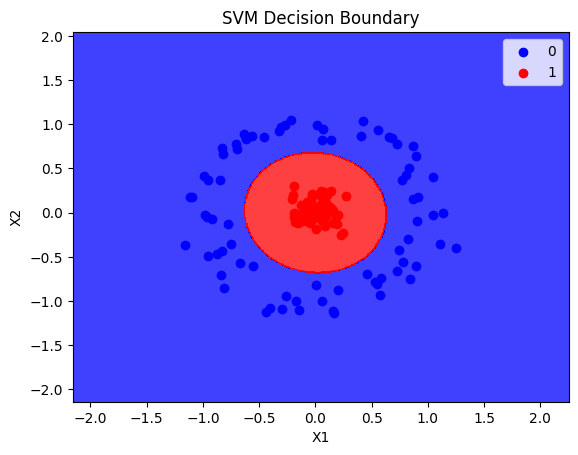

In [ ]:
plot_decision_boundary(X, y, poly_classifier)

Por último, otra opción que tenemos es hacer una transformación que mantenga la dimensionalidad pero que nos separe los datos para poder dividirlos linealmente.

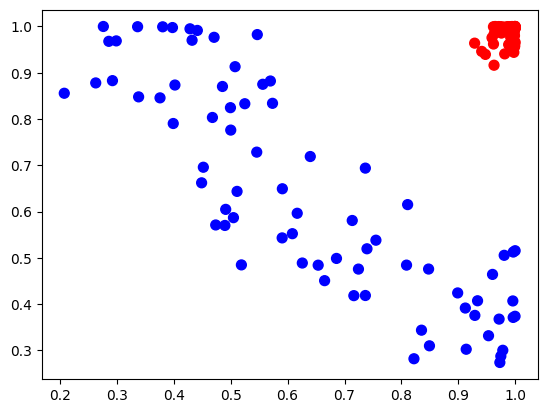

In [ ]:
X_new=np.exp(-(X**2))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')

#Datos no lineales

Ahora veamos otro caso en el que nuestros datos no son separables linealmente y estudiemos otras soluciones

25 25
25


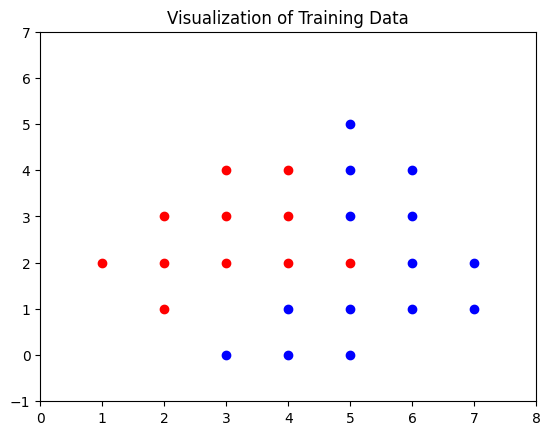

In [ ]:
import numpy as np

X = []
train_data = [[1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 5, 5], [2, 2, 1, 3, 2, 3, 4, 2, 3, 4, 2, 3, 0, 0, 1, 1, 0, 1, 2, 3, 4, 1, 2, 4, 5]]
print(len(train_data[0]), len(train_data[1]))
for i in range(len(train_data[0])):
  X.append([train_data[0][i], train_data[1][i]])

y = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(len(y))

X = np.array(X)
X_1 = np.c_[X, np.ones(25)]

# Graficamos condiciones iniciales!
fig, ax = plt.subplots()
ax.set_ylim([-1, 7])
ax.set_xlim([0, 8])
plt.title("Visualization of Training Data")
plt.scatter([x[0] for x in X_1[:11]],[x[1] for x in X_1[:11]],color="red")
plt.scatter([x[0] for x in X_1[11:]],[x[1] for x in X_1[11:]],color="blue")
plt.show()

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Veamos como nos va usando SVM lineal:

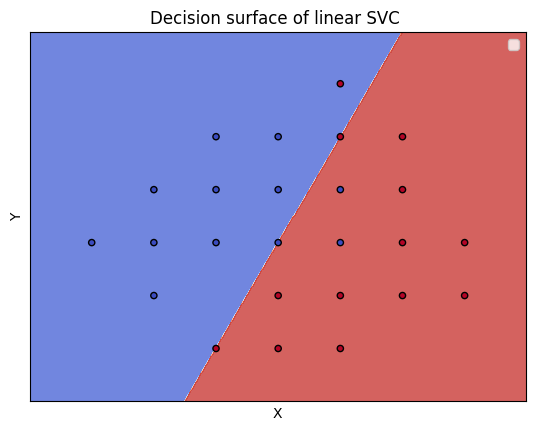

In [ ]:
model = svm.SVC(kernel='linear', C = 10)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Probemos ahora otro tipo de kernel

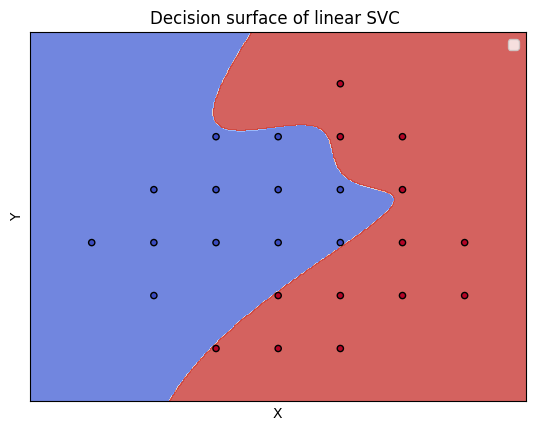

In [ ]:
model = svm.SVC(kernel='poly', degree = 7, C = 10)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

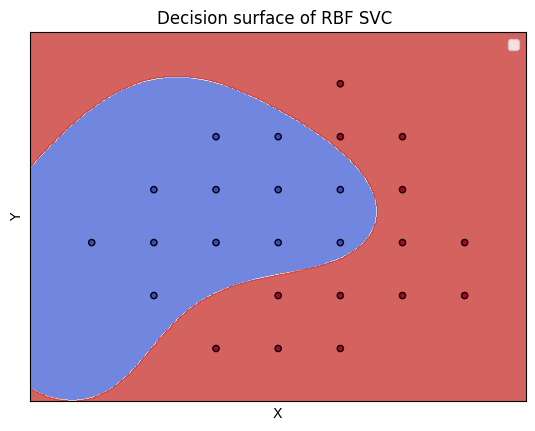

In [ ]:
model = svm.SVC(kernel='rbf', C = 10)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of RBF SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#SVM Multiclase

Link de utilidad: https://www.baeldung.com/cs/svm-multiclass-classification


In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

#Librerias de visualización:
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

In [ ]:
!wget "https://www.dropbox.com/s/v0gkfzv4xelvz3c/Iris.csv"

--2023-11-08 01:37:17--  https://www.dropbox.com/s/v0gkfzv4xelvz3c/Iris.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v0gkfzv4xelvz3c/Iris.csv [following]
--2023-11-08 01:37:18--  https://www.dropbox.com/s/raw/v0gkfzv4xelvz3c/Iris.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7734afe832eccf6e3c32818b82.dl.dropboxusercontent.com/cd/0/inline/CHGru7JBbryAPNo-OENblyy39JWAZ2JuSgohTOIya6WrHP3TuPTaIlI5gN_dJJGEEdtjNMSTCjO5tCB2R2bEJyX318V4WaOHgrKt5lI4pQrEzv8GGVx_3K9UaK1oKpCOgca2I1e2nI_gjhJgMV7U7q2i/file# [following]
--2023-11-08 01:37:19--  https://uc7734afe832eccf6e3c32818b82.dl.dropboxusercontent.com/cd/0/inline/CHGru7JBbryAPNo-OENblyy39JWAZ2JuSgohTOIya6WrHP3TuPTaIlI5gN_dJJGEEdtjNMSTCjO5tCB2R2bEJyX318V4WaOHgrKt5lI4pQrEzv8G

In [ ]:
iris_ds = pd.read_csv("Iris.csv")
iris_ds = iris_ds[["PetalLengthCm", "PetalWidthCm", "Species"]]

for i in range(len(iris_ds["Species"])):
  if iris_ds["Species"][i] == "Iris-setosa":
    iris_ds["Species"][i] = 0

  elif iris_ds["Species"][i] == "Iris-versicolor":
    iris_ds["Species"][i] = 1

  elif iris_ds["Species"][i] == "Iris-virginica":
    iris_ds["Species"][i] = 2

iris_ds.dropna()
iris_ds.Species = iris_ds.Species.astype("int64")


<ipython-input-12-f73de83d5297>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_ds["Species"][i] = 0
<ipython-input-12-f73de83d5297>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_ds["Species"][i] = 1
<ipython-input-12-f73de83d5297>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_ds["Species"][i] = 2


In [ ]:
iris_ds.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetalLengthCm  150 non-null    float64
 1   PetalWidthCm   150 non-null    float64
 2   Species        150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


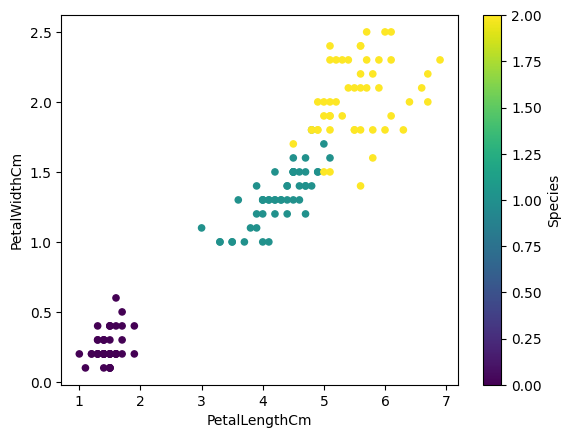

In [ ]:
graph = iris_ds.plot.scatter(x='PetalLengthCm',
                    y='PetalWidthCm',
                    c='Species',
                    colormap='viridis')

In [ ]:
X = iris_ds[["PetalLengthCm", "PetalWidthCm"]]
y = iris_ds["Species"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1010)
X_train.shape, X_test.shape

((120, 2), (30, 2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


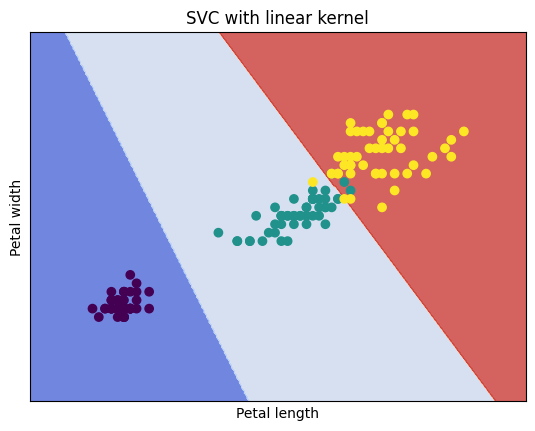

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


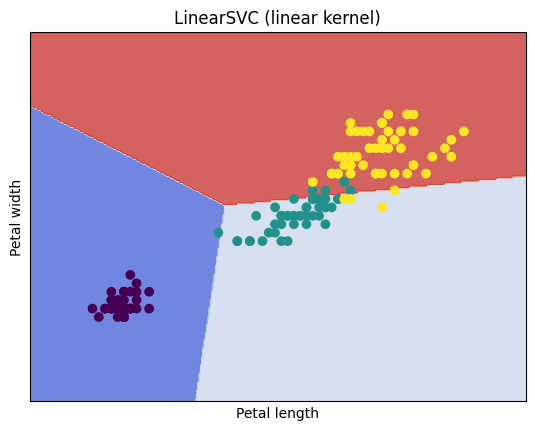

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


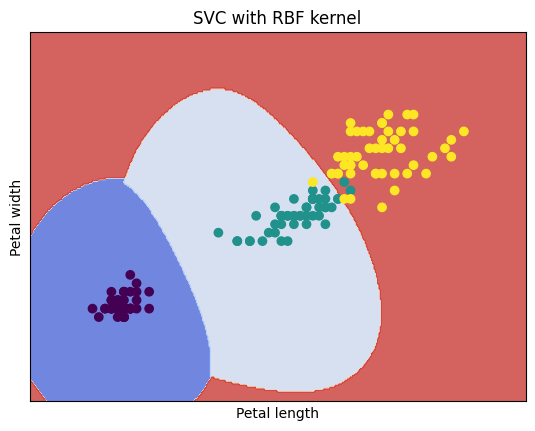

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


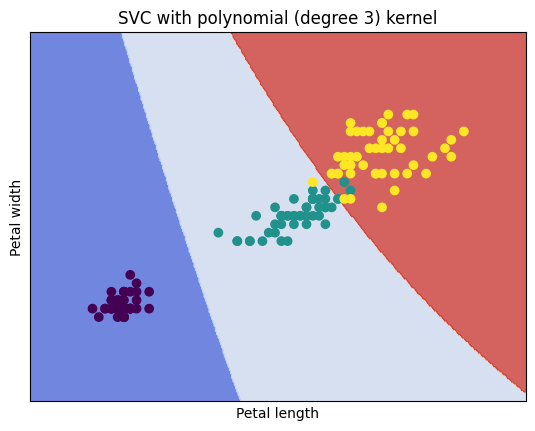

In [ ]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

# create a mesh to plot in
x_min, x_max = X_train["PetalLengthCm"].min() - 1, X_train["PetalLengthCm"].max() + 1
y_min, y_max = X_train["PetalWidthCm"].min() - 1, X_train["PetalWidthCm"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with Custom Kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc,)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # plt.subplot(2, 2, i + 1)
    # plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X["PetalLengthCm"], X["PetalWidthCm"], c=y, cmap=plt.cm.viridis)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

# plt.show()